# TAREA 2 : Grupo 8 (**Javier Muñoz de Torres y Álvaro Morán Lorente**)<br>


**Datos**: Trabajaremos con un conjunto de datos del ambito de medicina/salud, concretamente en relación a problemas al corazón. Los datos vienen de la unión de otros 4 datasets procedentes de Cleveland; Hungary; Switzerland y VA Long Beach, y han sido tomados de pacientes de hospitales.

**Base de datos**: [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease)<br>
En el conjunto de datos el target `num` es categórica, por lo que nos centraremos en una tarea de clasificación. Tiene un rango (0,4), es decir, 5 posibles niveles, que indican de menor a mayor la presencia de un problema en el corazon. El objetivo de este análisis es clasificar los pacientes, dados los atributos que mostraremos a continuación, según "la presencia de problemas" de corazon, lo que se puede interpretar con "como de probable es que tengas un problema de corazón".

**Interpretación del target:** <br>
Para darle un significado a ese rango (0,4), diremos que:<br>
`0` &rarr; Poco probable<br>
`1` &rarr; Algo probable<br>
`2` &rarr; Probable<br>
`3` &rarr; Bastante probable<br>
`4` &rarr; Muy probable<br>
Para nuestro análisis binarizaremos la variable objetivo (**`target`**). Asignaremos como clase positiva `1` aquellos diagnósticos en los que el estrechamiento de arterias es superior al 50% (problemas graves de corazón) y le asignaremos la clase negativa `0` a aquellos casos en los que el estrechamiento de arterias sea inferior al 50% (ausencia de problemas de corazón).
A continuación, analizaremos los atributos (features):

## Sección I. Esquema lineal (SVM)

Cargamos todas las librerias que vamos a utilizar a lo largo de la tarea.

In [138]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

En esta primera sección vamos a hacer uso del modelo Support Vector Machine (SVM) considerando todas las características presentes en el dataset.

In [139]:
# Cargamos los dataframes preprocesados en la tarea 1
X_Diseño_preprocesado = pd.read_pickle('X_Diseño_preprocesado.pkl')
X_test_preprocesado = pd.read_pickle('X_test_preprocesado.pkl')
Y_Diseño = pd.read_pickle('Y_Diseño.pkl')
Y_test = pd.read_pickle('Y_test.pkl')

In [140]:
svm_lineal = SVC(kernel = 'linear')
svm_lineal.fit(X_Diseño_preprocesado, Y_Diseño)
coeff_svm_lineal = list(map(float,svm_lineal.coef_[0]))
pairs = []
for i in range(len(coeff_svm_lineal)):
    pairs.append([coeff_svm_lineal[i],X_Diseño_preprocesado.columns[i]])
pd.DataFrame(pairs, columns=['Coeff', 'Feature'])

,Coeff,Feature
0,-0.163647,age
1,0.221199,sex
2,0.227613,trestbps
3,-0.100452,chol
4,-0.125688,fbs
5,0.000031,thalach
6,0.378430,exang
7,0.279256,oldpeak
8,0.801964,ca
9,-0.622205,cp_1.0


Se puede observar que los coeficientes que mas influyen en el target a la hora de clasificar son: <br>
* **Positivamente a la clase 1:**  <br>
    `1` ca : Número de vasos principales (0-3) coloreados por fluoroscopia <br>
    `2` cp_4.0 : Tipo de dolor en el pecho (Asintomático) <br>
    `3` thal_7.0 : Prueba de tálamo o tali (Efecto reversble) <br>
* **Positivamente a la clase 0:**  <br>
    `1` cp_1.0 : Tipo de dolor en el pecho (Angina típica) <br>
    `2` thal_3.0 Prueba de tálamo o tali (Efecto fijo) : <br>
    `3` slope_1.0 : La pendiente del segmento ST en el pico del ejercicio (Pendiente ascendente) <br>

 Coeficientes SVM lineal ?¿?¿??
?¿¿¿¿¿¿¿¿¿¿¿¿¿¿¿¿¿¿?¿??

### Importancia del escalado de los datos


La normalizacion/estandarización de los datos para crear un modelo SVM es esencial. Esto se debe a que el modelo de SVM utiliza muestras del entrenamiento que llamaremos 'vectores soporte' para crear la frontera que  separa linealmente las clases y maximiza la distancia a estos puntos. Como hace uso de la distancia euclidea necesitamos estandarizar los datos para trabajar con las misma escala.

### Comparacion con la regresión logística

In [141]:
coeff_reg_log = [-0.11519437219116264,
 0.566141608117244, 
 0.3099489241956889, 
 -0.012310801030252373,
 -0.2759661876682957, 
 -0.04660442981566006,
 0.6435409647784468, 
 0.5140459080033545, 
 1.1380068486464945, 
 -0.9828262177706325, 
 0.15509087190068083, 
 -0.581341375932084, 
 1.2202274133609519, 
 -0.3561452457617638, 
 -0.012267781149770146,
 0.17956371847045208, 
 -0.5633388805305239, 
 0.5956251051994648, 
 -0.22113553311002293,
 -0.6966608521082523, 
 -0.17539205144422487,
 0.6832035951113941]
# Creamos el dataframe de comparacion
coeff_comparacion = pd.DataFrame([coeff_reg_log], columns=X_Diseño_preprocesado.columns)
coeff_comparacion.loc[len(coeff_comparacion)] = coeff_svm_lineal
coeff_comparacion.loc[len(coeff_comparacion)] = abs(coeff_comparacion.iloc[0] - coeff_comparacion.iloc[1])
coeff_comparacion = coeff_comparacion.T
coeff_comparacion.columns = ['Coef_Regresion','Coef_SVM_lineal','Diferencia']
coeff_comparacion


,Coef_Regresion,Coef_SVM_lineal,Diferencia
age,-0.115194,-0.163647,0.048453
sex,0.566142,0.221199,0.344942
trestbps,0.309949,0.227613,0.082336
chol,-0.012311,-0.100452,0.088141
fbs,-0.275966,-0.125688,0.150278
thalach,-0.046604,0.000031,0.046636
exang,0.643541,0.378430,0.265111
oldpeak,0.514046,0.279256,0.234790
ca,1.138007,0.801964,0.336043
cp_1.0,-0.982826,-0.622205,0.360621


La svm en aproximadamente la mitad de los coeficientes apenas difiere con la regresión logística. En cuanto a los coeficientes más grandes, ambos modelos concuerdan en que los atributos más influyentes son:

* **Positivamente a la clase 1:**  <br>
     - thal_7.0 <br>
     - cp_4.0  <br>
     - ca  <br>
* **Positivamente a la clase 0:**  <br>
     - cp_1.0 <br>
     - thal_3.0 <br>

En la mayoría de coeficientes, ambos modelos, puesto que son similares, han llegado una conclusión similar. Algunas características que parecía relevante con 1 modelo ha acabado siendo descartada como influyente, como por ejemplo slope_1.0, oldpeak o exang. Por otro lado, ambos modelos coinciden a la hora de poner coeficientes muy bajos a ciertos atributos, como restecg_1.0, cp_2.0, thalach o chol.

### Prestaciones de los modelos


Ahora vamos a ver las prestaciones de ambos modelos para comparar los resultados y extraer conclusiones.

In [142]:
# Regresión logística
modelo_RL = LogisticRegression(C=0.001, solver='newton-cg', penalty=None, random_state=314)
modelo_RL.fit(X_Diseño_preprocesado, Y_Diseño)
modelo_RL_predict = modelo_RL.predict(X_test_preprocesado)

# SVM 
svm_lineal_predict = svm_lineal.predict(X_test_preprocesado)
dif = (modelo_RL_predict!=svm_lineal_predict).sum()
print(f"Numero predicciones distintas: {dif}")
print(f"Numero de observaciones: {X_test_preprocesado.shape[0]}")

Numero predicciones distintas: 1
Numero de observaciones: 91


Ambos modelos han predicho tan solo una observación distinta de 91 que hay en el conjunto de test, es decir, que sus prestaciones son practicamente idénticas. Ahora, comparemos directamente con las figuras de mérito.

In [143]:
#Obtenemos las figuras de merito
f1_lineal = f1_score(Y_test,svm_lineal_predict)
acc_lineal = accuracy_score(Y_test,svm_lineal_predict)
prec_lineal = precision_score(Y_test,svm_lineal_predict)
recall_lineal = recall_score(Y_test,svm_lineal_predict)


metrics_dict = {
    'Figura': ['F1-score', 'Accuracy', 'Precision', 'Recall'],
    'Valor': [f1_lineal, acc_lineal, prec_lineal, recall_lineal]
}

merito_lineal = pd.DataFrame(metrics_dict)



In [144]:
figuras_regresion_log = {
'RegresionLogistica_reg':     [0.846154,	0.815789,	0.861111,	0.775],
'SVM Lineal': [acc_lineal,f1_lineal,prec_lineal,recall_lineal]
}
tabla_regresion_log = pd.DataFrame(figuras_regresion_log, index=['Accuracy', 'F1_score', 'Precisión', 'Recall'])
tabla_regresion_log

,RegresionLogistica_reg,SVM Lineal
Accuracy,0.846154,0.835165
F1_score,0.815789,0.805195
Precisión,0.861111,0.837838
Recall,0.775000,0.775000


Tras calcular las figuras de mérito observamos que ambos modelos presentan unos resultados similares. Esto tiene sentido si tenemos en cuenta que ambos modelos tienen en comun 5 atributos como los mas relevantes/influyentes.

## Sección II. Esquema no lineal 

Las prestaciones del esquema lineal no son malas, pero no lo suficiente buenas como para asumir que es un problema linealmente separable por lo que probaremos 3 kernels no lineales, pero sin ajustar sus hiperparámetros todavía.

In [145]:
# Creamos el conjunto de train y validacion
X_train,X_val,Y_train ,Y_val= train_test_split(X_Diseño_preprocesado,Y_Diseño,random_state=314)

In [146]:
# Creamos los diferentes modelos con distintos kernel
kernels = ['linear', 'rbf', 'poly','sigmoid']
figuras_merito = {}

for kernel in kernels:
    #Creamos el modelo y predecimos
    svm_no_lineal = SVC(kernel = kernel,random_state=314)
    svm_no_lineal.fit(X_train,Y_train)
    prediccion = svm_no_lineal.predict(X_val)
    #Hallamos las figuras de mérito
    f1_kernel = f1_score(Y_val, prediccion)
    acc_kernel = accuracy_score(Y_val, prediccion)
    prec_kernel = precision_score(Y_val, prediccion)
    recall_kernel = recall_score(Y_val, prediccion)
    #Las guardamos en un diccionario
    figuras_merito[kernel] = {}
    figuras_merito[kernel]['f1_score'] = f1_kernel
    figuras_merito[kernel]['accuracy'] = acc_kernel
    figuras_merito[kernel]['precision'] = prec_kernel
    figuras_merito[kernel]['recall'] = recall_kernel    


In [147]:
df_figuras = pd.DataFrame(figuras_merito)
df_figuras

,linear,rbf,poly,sigmoid
f1_score,0.809524,0.844444,0.800000,0.818182
accuracy,0.849057,0.867925,0.849057,0.849057
precision,0.850000,0.826087,0.888889,0.818182
recall,0.772727,0.863636,0.727273,0.818182


Utilizando los kernel no lineales observamos mejores resultados que con el kernel lineal. El que produce mejores resultados es la **rbf**.   

### GRIDSEARCH CROSS-VALIDATION

Ahora vamos a ver como varía el *recall* en función de los hiperparámetros del *kernel* con mejores prestaciones.

In [148]:
hp_linear = {'C': np.linspace(0.01,40,20)}
hp_rbf = {'C': np.linspace(0,10,11),'gamma': np.linspace(0.005,0.3,14)}
hp_poly = {'C': np.linspace(0.01,30,10),'degree': [2,3,4],'gamma':  np.linspace(0.005,0.3,14)}
hp_sigmoid = {'C': np.linspace(0.01,30,10),'gamma': np.linspace(0.001,0.1,10)}
hiperparametros_kernels = []
hiperparametros_kernels.append(hp_linear)
hiperparametros_kernels.append(hp_rbf)
hiperparametros_kernels.append(hp_poly)
hiperparametros_kernels.append(hp_sigmoid)

Una vez guardado los valores de los hiperparámetros que vamos a utilizar usamos el método de *GridSearch* para buscar la mejor combinación de hiperparámetros.

In [149]:
# Busqueda de hiperparmáetros
resultados = {}
bestParams = {}
bestScores = {}
i = 0
while i < len(hiperparametros_kernels):
    SVM_cv = GridSearchCV(SVC(kernel=kernels[i],random_state=314),param_grid=hiperparametros_kernels[i],cv=4,scoring='recall',return_train_score=True)
    SVM_cv.fit(X_Diseño_preprocesado,Y_Diseño)
    resultados[kernels[i]] = SVM_cv.cv_results_
    bestParams[kernels[i]] = SVM_cv.best_params_
    bestScores[kernels[i]] = SVM_cv.best_score_
    print(f"Finished {kernels[i]}.")
    i += 1


Finished linear.
Finished rbf.
Finished poly.
Finished sigmoid.


### LINEAR KERNEL

Primero vamos a representar los resultados del kernel lineal

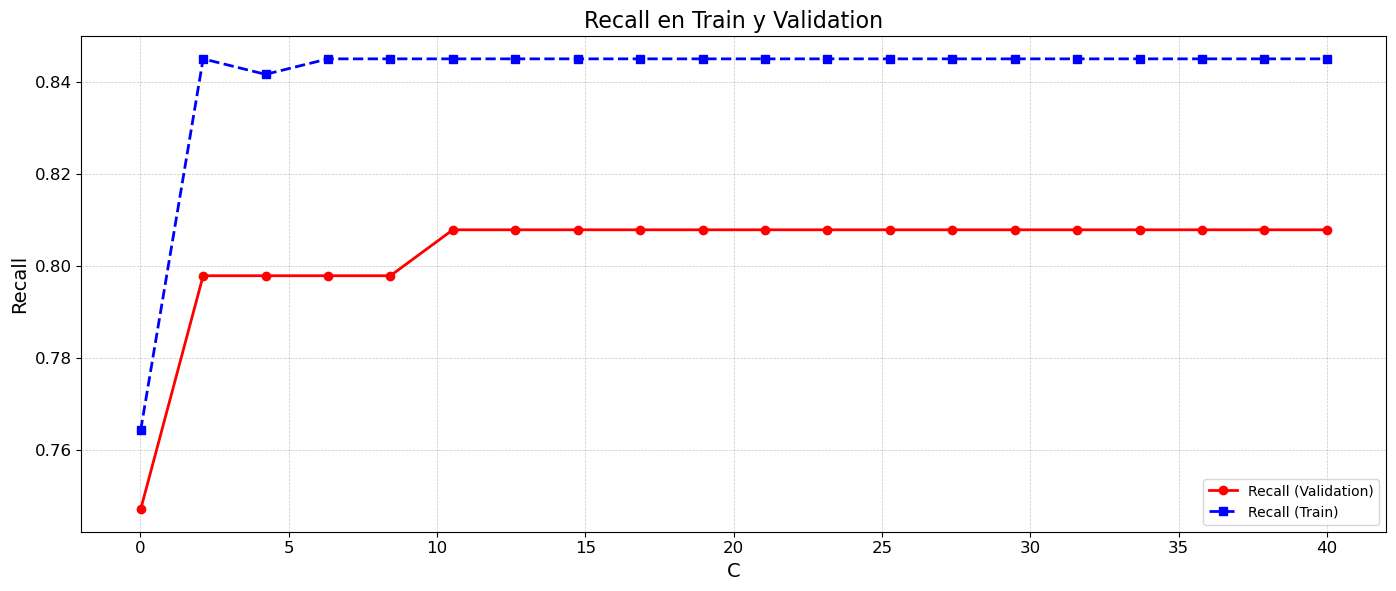

In [150]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
recall_scores_test = np.array(resultados['linear']['mean_test_score'], dtype=float)
recall_scores_train = np.array(resultados['linear']['mean_train_score'], dtype=float)
C_params = np.array(resultados['linear']['param_C'], dtype=float)

# Crear la gráfica
plt.figure(figsize=(14, 6))

# Plot para el recall de test
plt.plot(C_params, recall_scores_test, color='red', linestyle='-', linewidth=2, label='Recall (Validation)', marker='o', markersize=6)

# Plot para el recall de train
plt.plot(C_params, recall_scores_train, color='blue', linestyle='--', linewidth=2, label='Recall (Train)', marker='s', markersize=6)

# Agregar etiquetas y título
plt.xlabel('C', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.title('Recall en Train y Validation', fontsize=16)
plt.legend()

# Mejorar la apariencia
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)  # Mejorar el estilo de la rejilla
plt.tight_layout()  # Ajustar el espaciado de la gráfica para que no se corte
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar la gráfica
plt.show()


Se puede apreciar que el modelo a partir de un C = 9, C = 11 el modelo ya estabiliza y no consigue mayores resultados, y como un mayor valor de C tiende a sobreajustar nos quedaremos con C = 11.

### RBF KERNEL

Ahora vamos a representar los resultados utilizando como *kernel* la **RBF**. Para ello, debido a que tenemos 2 parametros a estimar, representaremos en 3 dimensiones y de varías formas.

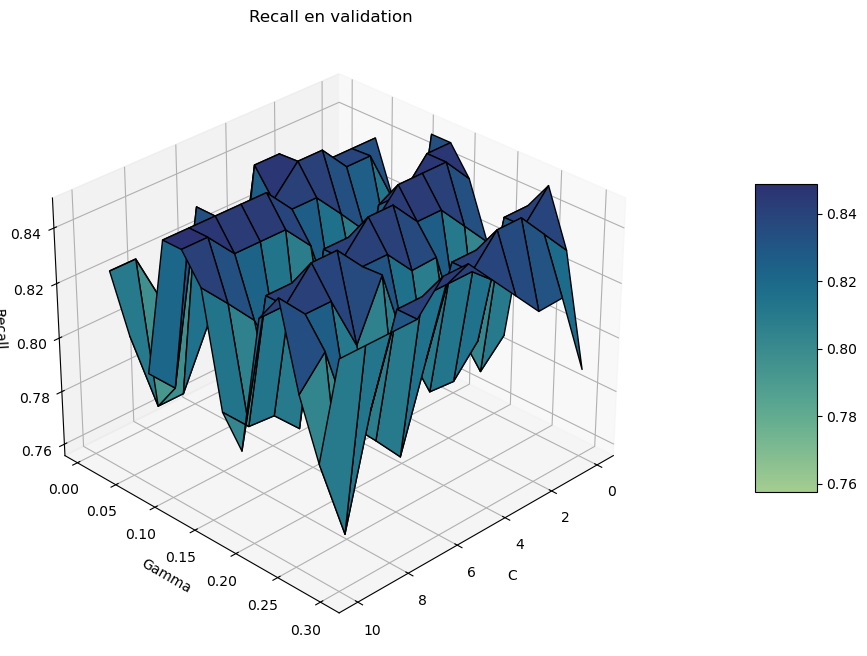

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extraer los resultados del GridSearchCV para el kernel RBF
kernel_rbf_results = resultados['rbf']  # Ajusta si la clave en tu diccionario es diferente

# Extraer los valores de los hiperparámetros y el score
C_values = kernel_rbf_results['param_C'].data  # Valores de C
gamma_values = kernel_rbf_results['param_gamma'].data  # Valores de gamma
recall_scores = kernel_rbf_results['mean_test_score']  # Recall medio

# Asegurarse de convertir todo a arrays NumPy para trabajar más fácilmente
C_values = np.array(C_values, dtype=float)
gamma_values = np.array(gamma_values, dtype=float)
recall_scores = np.array(recall_scores, dtype=float)

# Crear una malla de C y gamma para el gráfico 3D
C_unique = np.unique(C_values)
gamma_unique = np.unique(gamma_values)

# Reorganizar el score (recall) en formato de malla
C_grid, gamma_grid = np.meshgrid(C_unique, gamma_unique)

# Reshape del score para que coincida con la malla
recall_grid = recall_scores.reshape(len(gamma_unique), len(C_unique))

# Crear el gráfico 3D
fig = plt.figure(figsize=(30, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar la superficie
surf = ax.plot_surface(C_grid, gamma_grid, recall_grid, cmap='crest', edgecolor='k')

ax.view_init(elev=30, azim=45)  # PARA ROTAR!!!

# Etiquetas de los ejes
ax.set_xlabel('C')
ax.set_ylabel('Gamma')
ax.set_zlabel('Recall')
ax.set_title('Recall en validation')

# Barra de colores para el score
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Mostrar el gráfico
plt.show()


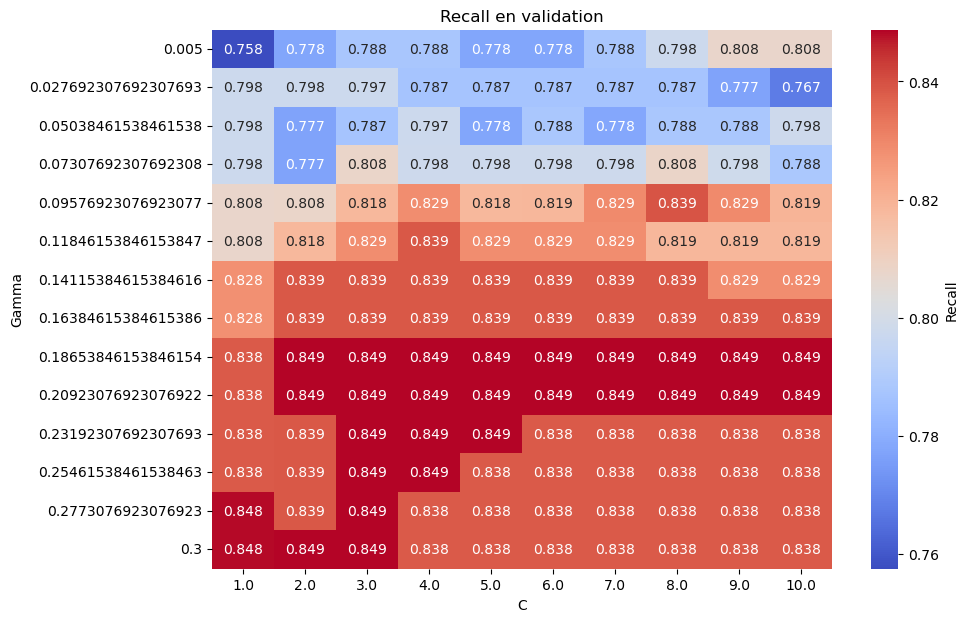

In [152]:
# Extraer resultados del GridSearchCV
kernel_rbf_results = resultados['rbf'] 

# Extraer los valores de C, gamma y el score
C_values = kernel_rbf_results['param_C'].data
gamma_values = kernel_rbf_results['param_gamma'].data
recall_scores = kernel_rbf_results['mean_test_score']

# Creamos un DataFrame para facilitar el manejo de datos
df = pd.DataFrame({
    'C': C_values,
    'Gamma': gamma_values,
    'Recall': recall_scores
})

# Creamos una tabla pivotante para el heatmap
pivot_table = df.pivot_table(index='Gamma', columns='C', values='Recall')

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".3f", cbar_kws={'label': 'Recall'})
plt.title('Recall en validation')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.show()

In [153]:
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

# Crear gráfico interactivo
fig = go.Figure(data=[go.Surface(z=recall_grid, x=C_unique, y=gamma_unique, colorscale='Inferno')]) #Prueba con Inferno, Magma y Jet

# Etiquetas
fig.update_layout(
    title='Recall en validation',
    scene=dict(
        xaxis_title='C',
        yaxis_title='Gamma',
        zaxis_title='Recall'
    )
)

fig.show()

TypeError: 'dict' object is not callable

In [58]:
import plotly.express as px
import pandas as pd

# Crear DataFrame
df_plotly = pd.DataFrame({
    'C': C_values,
    'Gamma': gamma_values,
    'Recall': recall_scores
})

# Gráfico Scatter 3D interactivo
fig = px.scatter_3d(df_plotly, x='C', y='Gamma', z='Recall', color='Recall', title='Recall en validation', color_continuous_scale='Jet')
fig.show()

Tras todas estas gráficas, vemos que ha una zona específica donde se obtienen los mayores valores de recall (por hacer una analogía, es una especie de "meseta"). A priori no hay preferencia en cuanto a que punto seleccionar, por lo que tomaremos uno relativamente central, contretamente el *C* = **4** y *gamma* = **0.021**, con un recall en validation de 0.85.

### POLY KERNEL

Para el kernel **POLY** no podemos hacer una representacion debido a que tenemos 3 hiperparámetros que buscar, requeriríamos 4 dimensiones para esta tarea. Por lo tanto, vamos a seleccionar los mejores parametros que nos devuelve la funcion Gridsearch

In [59]:
list(bestParams['poly'].keys())
for p in list(bestParams['poly'].keys()):
    print(p,"->",bestParams['poly'][p])

print("Recall validation ->",bestScores['poly'])

C -> 3.342222222222222
degree -> 3
gamma -> 0.16384615384615386
Recall validation -> 0.8383333333333334


Obtenemos como mejores hiperparametros son *C* = **3.34**, *degree* = **3** y *gamma* = **0.016** con un recall de 0.838 en validation. 

### SIGMOID KERNEL

Ahora vamos a representar los resultados utilizando como *kernel* la **SIGMOID**.

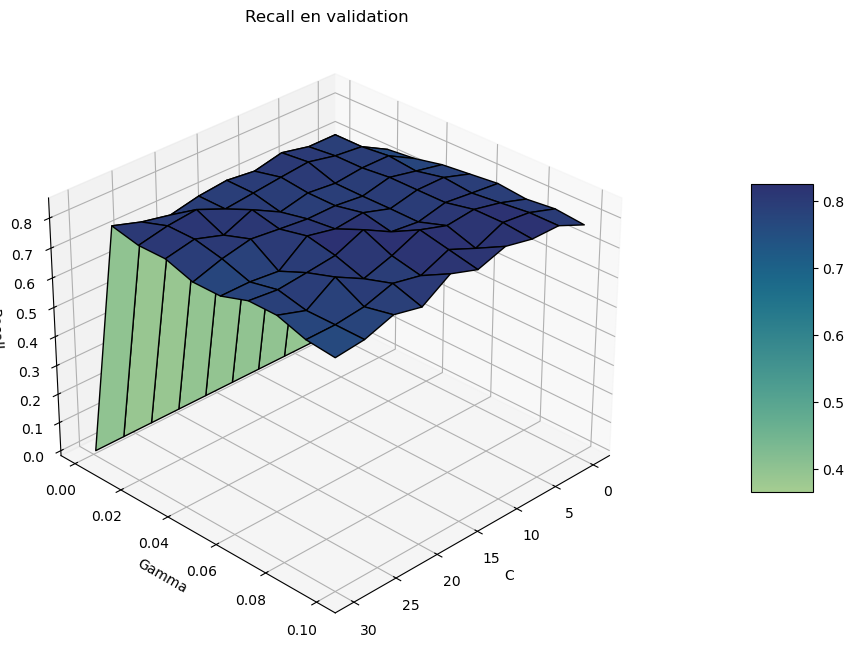

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extraer los resultados del GridSearchCV para el kernel RBF
kernel_sigmoid_results = resultados['sigmoid']  # Ajusta si la clave en tu diccionario es diferente

# Extraer los valores de los hiperparámetros y el score
C_values = kernel_sigmoid_results['param_C'].data  # Valores de C
gamma_values = kernel_sigmoid_results['param_gamma'].data  # Valores de gamma
recall_scores = kernel_sigmoid_results['mean_test_score']  # Recall medio

# Asegurarse de convertir todo a arrays NumPy para trabajar más fácilmente
C_values = np.array(C_values, dtype=float)
gamma_values = np.array(gamma_values, dtype=float)
recall_scores = np.array(recall_scores, dtype=float)

# Crear una malla de C y gamma para el gráfico 3D
C_unique = np.unique(C_values)
gamma_unique = np.unique(gamma_values)

# Reorganizar el score (recall) en formato de malla
C_grid, gamma_grid = np.meshgrid(C_unique, gamma_unique)

# Reshape del score para que coincida con la malla
recall_grid = recall_scores.reshape(len(gamma_unique), len(C_unique))

# Crear el gráfico 3D
fig = plt.figure(figsize=(30, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar la superficie
surf = ax.plot_surface(C_grid, gamma_grid, recall_grid, cmap='crest', edgecolor='k')

ax.view_init(elev=30, azim=45)  # PARA ROTAR!!!

# Etiquetas de los ejes
ax.set_xlabel('C')
ax.set_ylabel('Gamma')
ax.set_zlabel('Recall')
ax.set_title('Recall en validation')

# Barra de colores para el score
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Mostrar el gráfico
plt.show()

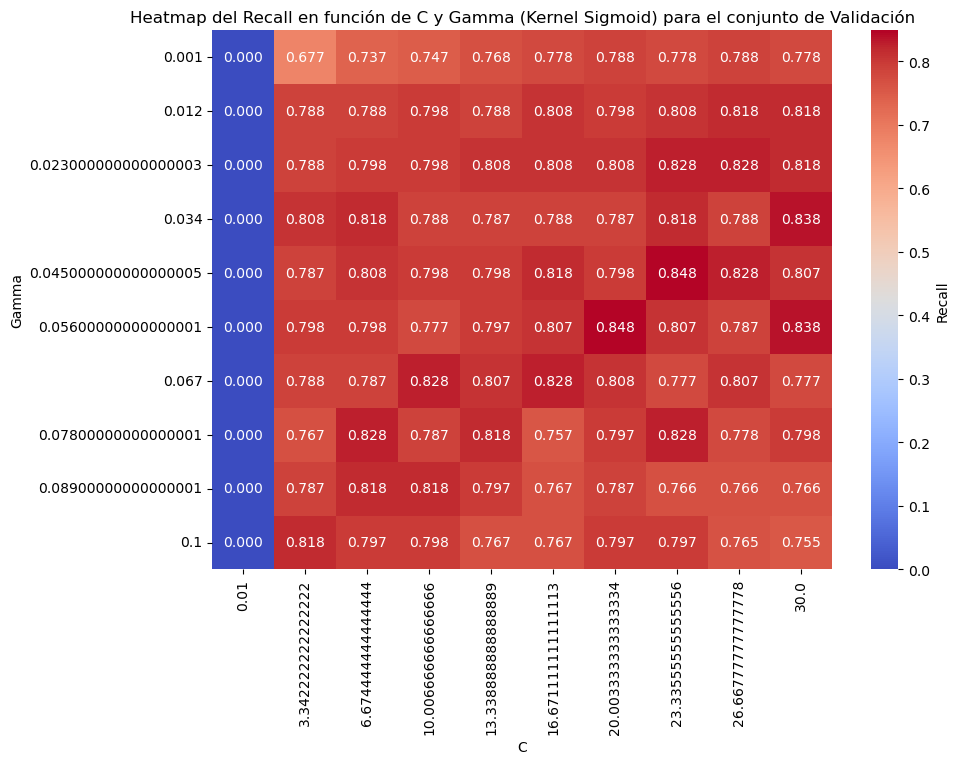

In [61]:
# Extraer resultados del GridSearchCV
kernel_sigmoid_results = resultados['sigmoid']  # Asegúrate de que es el kernel correcto

# Extraer los valores de C, gamma y el score
C_values = kernel_sigmoid_results['param_C'].data
gamma_values = kernel_sigmoid_results['param_gamma'].data
recall_scores = kernel_sigmoid_results['mean_test_score']

# Crear un DataFrame para facilitar el manejo de datos
df = pd.DataFrame({
    'C': C_values,
    'Gamma': gamma_values,
    'Recall': recall_scores
})

# Crear una tabla pivotante para el heatmap
pivot_table = df.pivot_table(index='Gamma', columns='C', values='Recall')

# Dibujar el heatmap con Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".3f", cbar_kws={'label': 'Recall'})  # PRUEBA: coolwarm , YlOrRd , crest
plt.title('Heatmap del Recall en función de C y Gamma (Kernel Sigmoid) para el conjunto de Validación')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.show()


In [ ]:
# Extraer resultados del GridSearchCV
kernel_sigmoid_results = resultados['sigmoid']  # Asegúrate de que es el kernel correcto

# Extraer los valores de C, gamma y el score
C_values = kernel_sigmoid_results['param_C'].data
gamma_values = kernel_sigmoid_results['param_gamma'].data
recall_scores = kernel_sigmoid_results['mean_test_score']

# Crear un DataFrame para facilitar el manejo de datos
df = pd.DataFrame({
    'C': C_values,
    'Gamma': gamma_values,
    'Recall': recall_scores
})
    
# Crear un gráfico Scatter 3D interactivo con Plotly
import plotly.express as px
fig = px.scatter_3d(df, x='C', y='Gamma', z='Recall', color='Recall', 
                    title='Recall en función de C y Gamma (Kernel Sigmoid)', 
                    color_continuous_scale='Jet')
fig.show()

Para el kernel *sigmoid* hemos obtenido como mejores hiperparámetros *C* = **20** y *gamma* = **0.5** con un recall de 0.848 en validation.

#### Arquitectura seleccionada

El mejor kernel que hemos obtenido ha sido el **RBF** con un recall de 0.85, con los parametros *C* = **4** y *gamma* = **0.21**.

Tras esto, vamos a testear el modelo con el conjunto de test para 4 figuras de mérito:

In [63]:
# Crear y entrenar el modelo
svm_rbf = SVC(kernel='rbf', C=4, gamma=0.21, random_state=314)
svm_rbf.fit(X_Diseño_preprocesado, Y_Diseño)

# Predicción
svm_rbf_predict = svm_rbf.predict(X_test_preprocesado)

# Obtener las métricas
f1_svmRBF = f1_score(Y_test, svm_rbf_predict)
acc_svmRBF = accuracy_score(Y_test, svm_rbf_predict)
prec_svmRBF = precision_score(Y_test, svm_rbf_predict)
recall_svmRBF = recall_score(Y_test, svm_rbf_predict)

metrics_dict = {
    'Figura': ['F1-score', 'Accuracy', 'Precision', 'Recall'],
    'Valor': [f1_svmRBF, acc_svmRBF, prec_svmRBF, recall_svmRBF]
}

merito_kernel = pd.DataFrame(metrics_dict)

# Mostrar el DataFrame
merito_kernel

,Figura,Valor
0,F1-score,0.75000
1,Accuracy,0.78022
2,Precision,0.75000
3,Recall,0.75000


A la hora de evaluar el modelo, hemos obtenido unos resultado bastante inferiores a los obtenidos en la Tarea 1, parece que este modelo no nos va a servir del todo.

## Método Wrapper

Ahora vamos a utilizar el metodo wrapper mediante forward selection para encontrar las características más relevantes e intentar reducir la dimensionalidad de nuestra tarea.

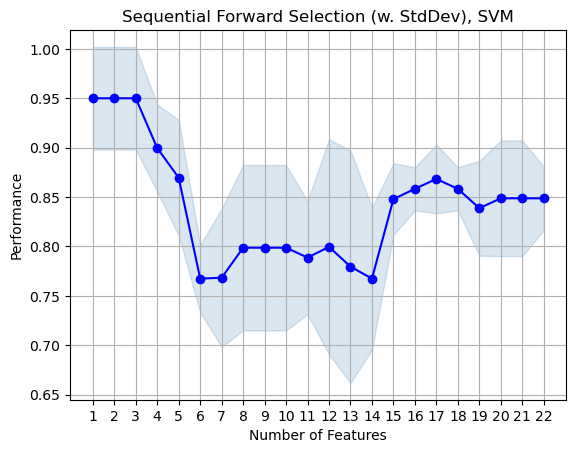

Las variables seleccionadas son: ['cp_2.0']


In [64]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import pandas as pd
import matplotlib.pyplot as plt

# Definir el mejor modelo SVM
best_svm = SVC(kernel='rbf', random_state=314, C=4, gamma=0.21)

# Configurar Sequential Feature Selection (Forward Selection)
sfs_fw = SFS(best_svm, 
             k_features=(1, 22),  # Selección de entre 1 y 22 características
             forward=True,        # Forward Selection
             floating=False,      #
             scoring='recall',    # Métrica de evaluación
             cv=4)                # Validación cruzada con 4 particiones

# Ajustar el selector al conjunto de datos
sfs_fw = sfs_fw.fit(X_Diseño_preprocesado, Y_Diseño)

# Representar los resultados
fig1 = plot_sfs(sfs_fw.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev), SVM')
plt.grid()
plt.show()

# Convertir los resultados a un DataFrame
forward_selection = pd.DataFrame.from_dict(sfs_fw.get_metric_dict()).T

# Seleccionar el mejor subconjunto de características

mejor_indice = forward_selection['avg_score'].idxmax()
SVM_features = list(forward_selection.loc[mejor_indice, 'feature_names'])

# Mostrar las características seleccionadas
print(f'Las variables seleccionadas son: {SVM_features}')



In [65]:
# Crear un nuevo DataFrame con las características seleccionadas
X_diseno_wrapped = X_Diseño_preprocesado[['cp_2.0']]


In [164]:

# Entrenar el modelo
best_svm.fit(X_diseno_wrapped, Y_Diseño)

# Predecir con el modelo
Y_wrapper = best_svm.predict(X_test_preprocesado[['cp_2.0']])

# Calcular las métricas
recall_wrapper = recall_score(Y_test, Y_wrapper)
accuracy_wrapper = accuracy_score(Y_test, Y_wrapper)
precision_wrapper = precision_score(Y_test, Y_wrapper)
f1_wrapper = f1_score(Y_test, Y_wrapper)

# Crear un diccionario con las métricas
metrics_dict = {
    'Figura': ['F1_score', 'Accuracy', 'Precision', 'Recall'],
    'Valor': [f1_wrapper, accuracy_wrapper, precision_wrapper, recall_wrapper]
}

# Convertir el diccionario en un DataFrame
merito_wrapper = pd.DataFrame(metrics_dict)

# Mostrar el DataFrame
merito_wrapper

,Figura,Valor
0,F1_score,0.637168
1,Accuracy,0.549451
2,Precision,0.493151
3,Recall,0.900000


<Axes: xlabel='cp_2.0', ylabel='count'>

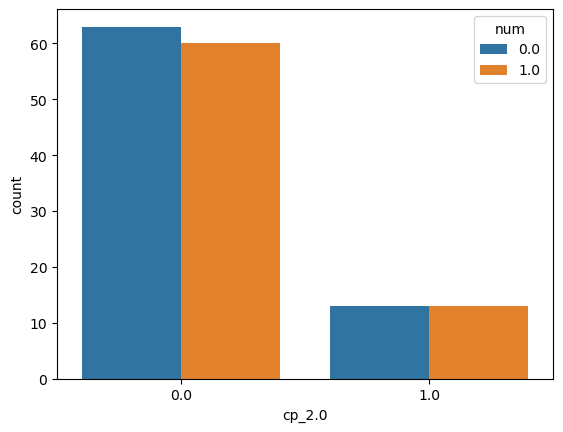

In [165]:
sns.countplot(data = X_diseno_wrapped,x = 'cp_2.0',hue=Y_Diseño['num'])

Observamos que al solo usar una característica obtenemos un recall de 0.9 pero todas las demás figuras de mérito tienen valores muy bajos, por lo que descartamos este modelo, y tras pintarnos la característica elegida y diferenciar por clases vemos que no hay separación, por lo que el accuracy tan bajo obtenido tiene sentido.

## Sección III. Comparación de resultados

En esta última sección vamos a comparar las figuras de mérito obtenidas con los distintos modelos, siendo la SVM con el kernel lineal sin ajuste de hiperparámetros,  la SVM utilizando  como kernel la RBF y con ajuste de hiperparámetros y con las características reducias tras usar el metodo wrapper.

In [166]:
# Datos originales
tabla_Resultados = {
    'RegresionLogistica_reg':     [0.846154, 0.815789, 0.861111, 0.775],
    'RegresionLogistica_wrapped': [0.791209, 0.759494, 0.769231, 0.75],
    'MLP_1layer':                 [0.846154, 0.820513, 0.842105, 0.8],
    'MLP_1layer_wrapped':        [0.802198, 0.769231, 0.789474, 0.75]
}

# Crear DataFrame
tabla_Resultados = pd.DataFrame(tabla_Resultados, index=['Recall', 'Accuracy', 'Precisión', 'F1_score'])

# Cambiar el orden de las filas
nuevo_orden = ['F1_score', 'Accuracy', 'Precisión', 'Recall']
tabla_Resultados = tabla_Resultados.loc[nuevo_orden]

tabla_Resultados.T


,F1_score,Accuracy,Precisión,Recall
RegresionLogistica_reg,0.775,0.815789,0.861111,0.846154
RegresionLogistica_wrapped,0.750,0.759494,0.769231,0.791209
MLP_1layer,0.800,0.820513,0.842105,0.846154
MLP_1layer_wrapped,0.750,0.769231,0.789474,0.802198


In [167]:
lineal = merito_lineal
wrapper = merito_wrapper
kernel = merito_kernel
dict = {
    'SVM_Lineal': list(lineal.Valor),
    'SVM_Wrapper': list(wrapper.Valor),
    'SVM_Kernel': list(kernel.Valor),
    
}
resultados = pd.DataFrame(dict,index=['F1_score','Accuracy','Precisión','Recall'])

dfFinal = pd.concat([tabla_Resultados.T, resultados.T])
dfFinal


,F1_score,Accuracy,Precisión,Recall
RegresionLogistica_reg,0.775000,0.815789,0.861111,0.846154
RegresionLogistica_wrapped,0.750000,0.759494,0.769231,0.791209
MLP_1layer,0.800000,0.820513,0.842105,0.846154
MLP_1layer_wrapped,0.750000,0.769231,0.789474,0.802198
SVM_Lineal,0.805195,0.835165,0.837838,0.775000
SVM_Wrapper,0.637168,0.549451,0.493151,0.900000
SVM_Kernel,0.750000,0.780220,0.750000,0.750000


De los esquemas utilazdos en esta tarea obtenemos un mejor rendimiento en el SVM lineal sin ajuste de hiperparámetros, por lo que si sólo pudieramos quedarnos con un modelo de la segunda tarea escogeriamos ese, aunque el modelo de MLP de 1 sola capa de la tarea 1 sigue siendo el mejor modelo de todo en nuestra opición, ya que es el que mejor valor de recall presenta de entre los modelos con las demás figuras de mérito altas, y valoramos que en nuestra tarea tiene más importancia.